### Exploratory Data Analysis(EDA)

* We will begin our data analysis by exploring the univariate and bivariate aspects of our columns to identify any relationships between factors. This includes investigating if there are specific times, dates, or months when crimes are more likely to occur, and whether there are any patterns that can help us understand these occurrences. By the end of the Exploratory Data Analysis (EDA), we aim to gain a comprehensive understanding of the patterns and trends in our crime dataset.

In [3]:
# We are gonna Import necessary Libraries to get the work done
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
#We are Extracting our data from the csv file we downloaded
file_path = r"C:\Users\Alex\Desktop\Coding Project\Decision-Bot\data\NYPD_Arrest_Data_2023.csv"
df = pd.read_csv(file_path)

#### Description of the columns in the data set

* ARREST_KEY: Randomly generated persistent ID for each arrest.
* ARREST_DATE: Exact date of arrest for the reported event.
* PD_CD: Three-digit internal classification code (more granular than Key Code).
* PD_DESC:    Description of the internal classification corresponding with the PD code.
* KY_CD:    Three-digit internal classification code (more general category than PD code).
* OFNS_DESC:    Description of internal classification corresponding with KY code (more general category than PD description).
* LAW_CODE:    Law code charges corresponding to the NYS Penal Law, VTL, and other various local laws.
* LAW_CAT_CD:    Level of offense: felony, misdemeanor, violation.
* ARREST_BORO:    Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens).
* ARREST_PRECINCT:    Precinct where the arrest occurred.
* JURISDICTION_CODE: Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit), and 2(Housing) represent NYPD, while codes 3 and above represent non-NYPD jurisdictions.
* AGE_GROUP: Perpetrator’s age within a category.
* PERP_SEX: Perpetrator’s sex description.
* PERP_RACE: Perpetrator’s race description.
* X_COORD_CD: Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104).
* Y_COORD_CD: Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104).
* Latitude: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326).
* Longitude: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326).

In [5]:
# We are using this code to print the first 5 rows of the data to get a look with what we are working 
df.head()


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042


In [6]:
# We are checking Dtypes in Columns and Null values within our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         170095 non-null  int64  
 1   ARREST_DATE        170095 non-null  object 
 2   PD_CD              170095 non-null  int64  
 3   PD_DESC            170095 non-null  object 
 4   KY_CD              170082 non-null  float64
 5   OFNS_DESC          170095 non-null  object 
 6   LAW_CODE           170095 non-null  object 
 7   LAW_CAT_CD         168838 non-null  object 
 8   ARREST_BORO        170095 non-null  object 
 9   ARREST_PRECINCT    170095 non-null  int64  
 10  JURISDICTION_CODE  170095 non-null  int64  
 11  AGE_GROUP          170095 non-null  object 
 12  PERP_SEX           170095 non-null  object 
 13  PERP_RACE          170095 non-null  object 
 14  X_COORD_CD         170095 non-null  int64  
 15  Y_COORD_CD         170095 non-null  int64  
 16  La

In [7]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
#We are uisng this code to see what is our staticis summary of the code 
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [9]:
# We are writing this code to see how many missing values are in each column 
df.isna().sum()#isna() is telling us the missing value and .sum() is the amount in total of the column

ARREST_KEY              0
ARREST_DATE             0
PD_CD                   0
PD_DESC                 0
KY_CD                  13
OFNS_DESC               0
LAW_CODE                0
LAW_CAT_CD           1257
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

In [10]:
# Univariate Analysis - Histograms for each numerical variable
def plot_univariate(df, width=10, height=3):
    num_columns = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(nrows=len(num_columns), figsize=(width, height * len(num_columns)))
    for col, ax in zip(num_columns, axes):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()


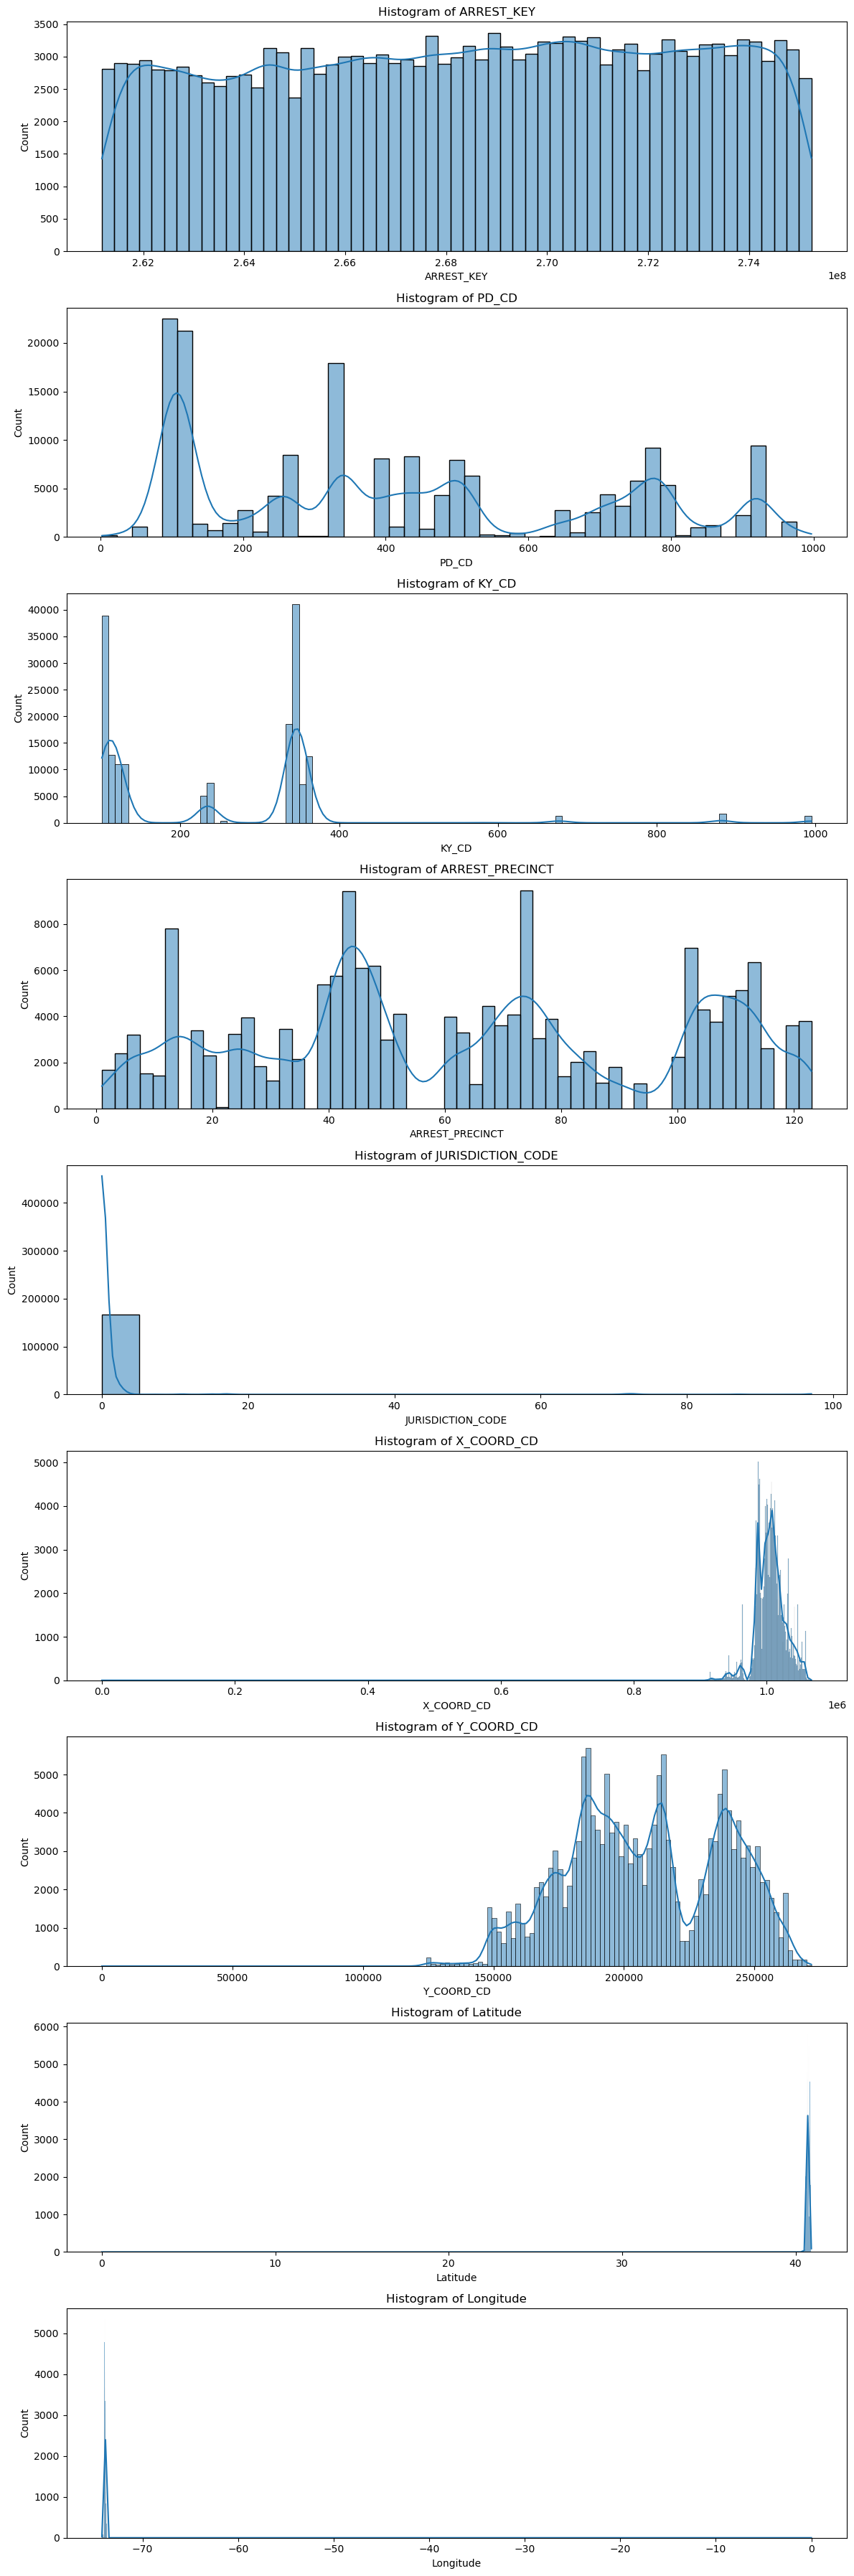

In [11]:
plot_univariate(df, width=12, height= 4)

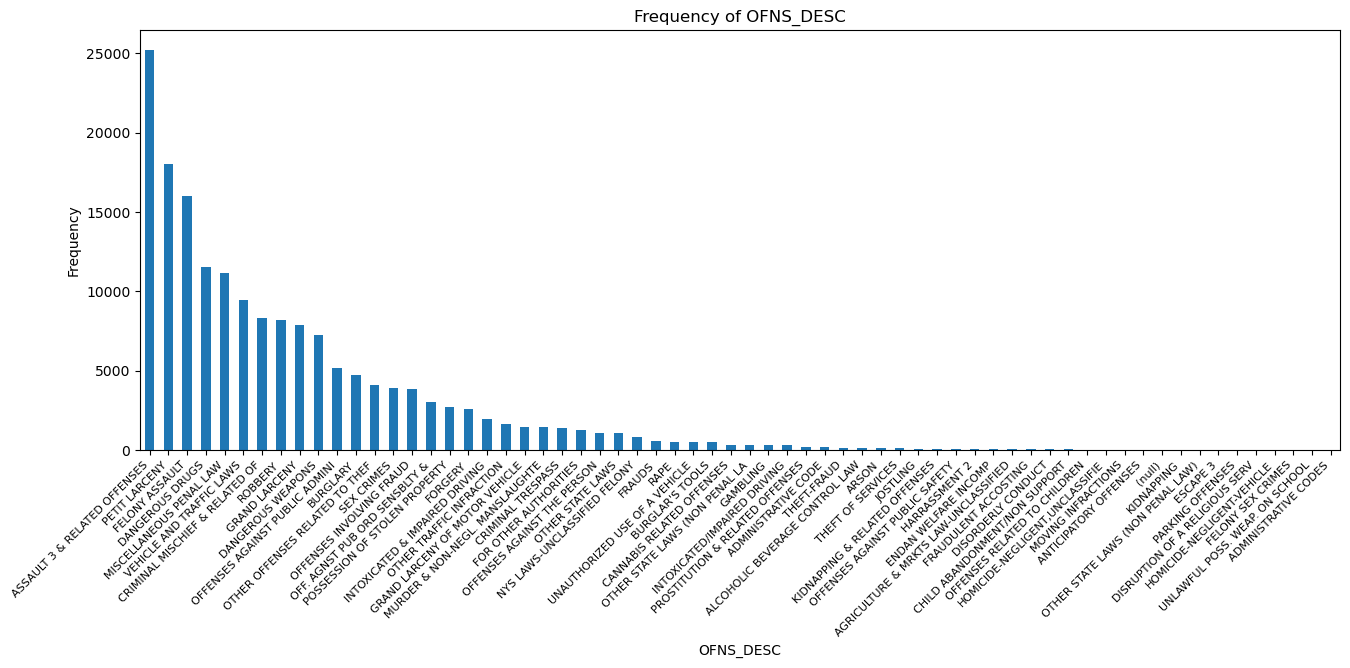

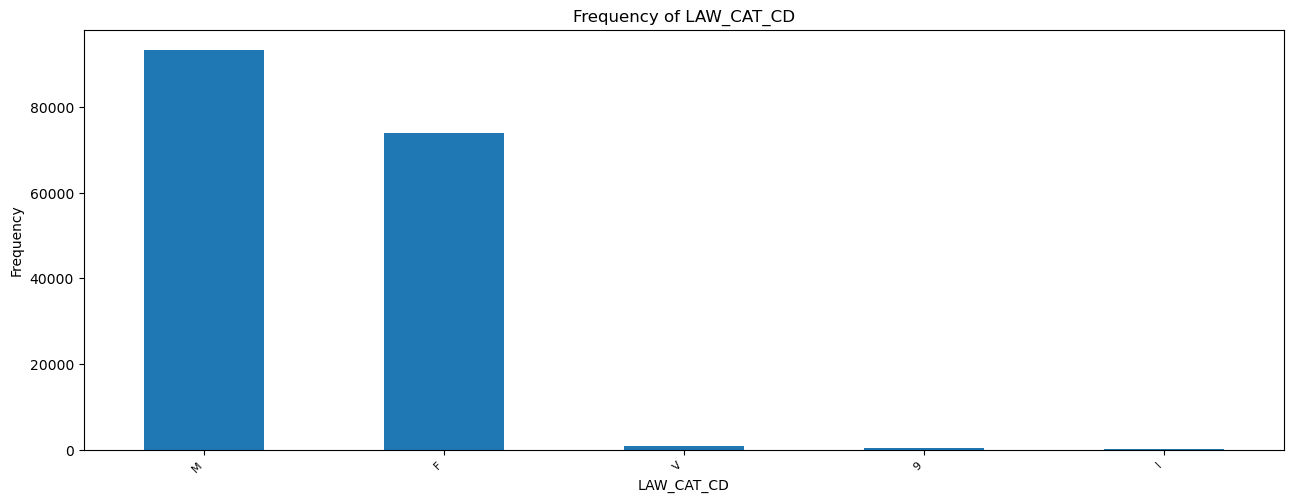

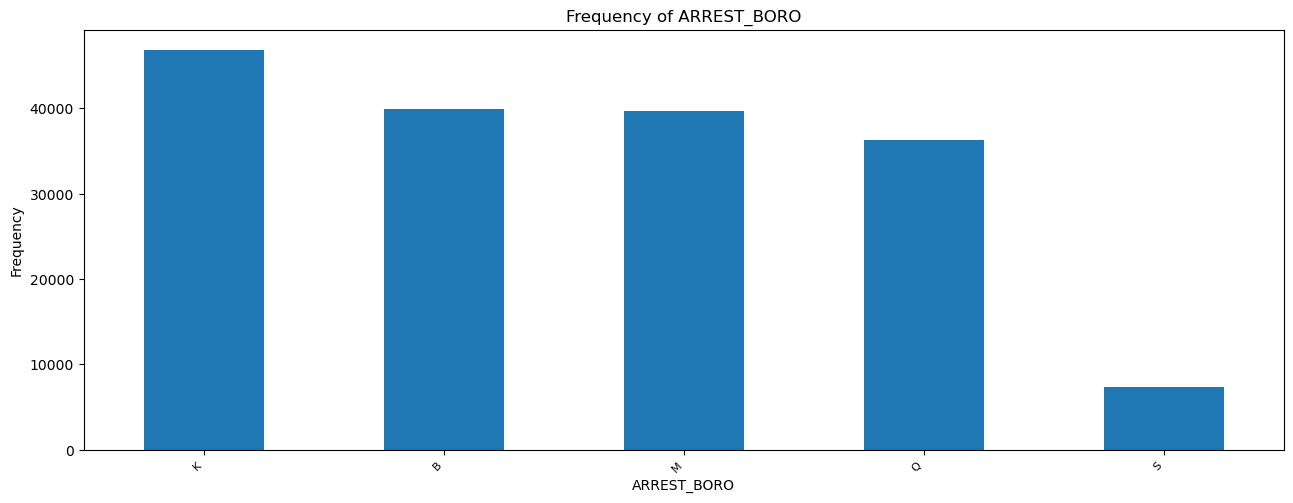

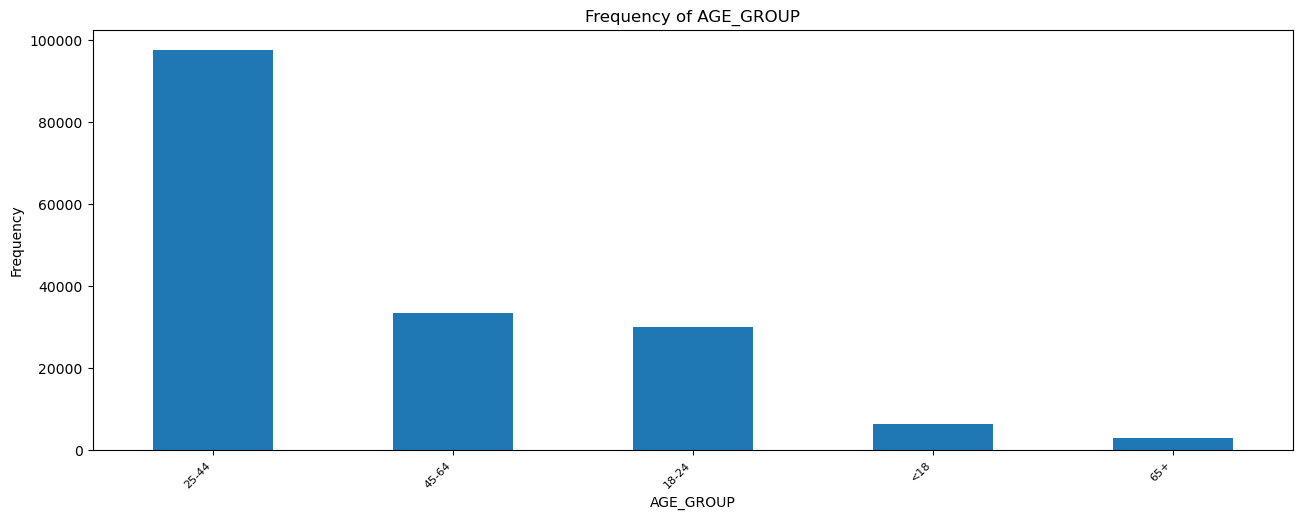

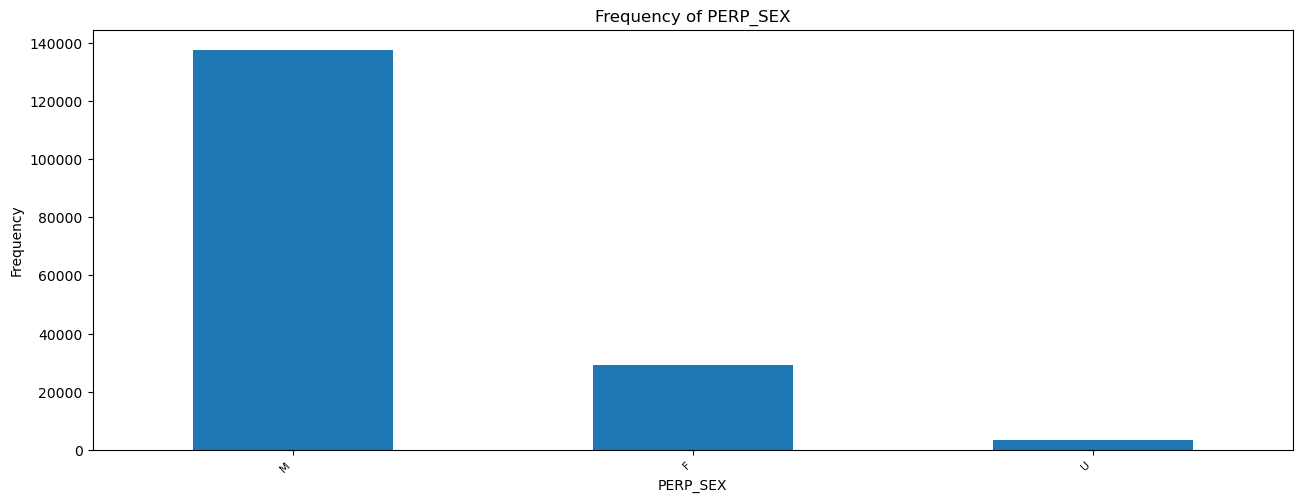

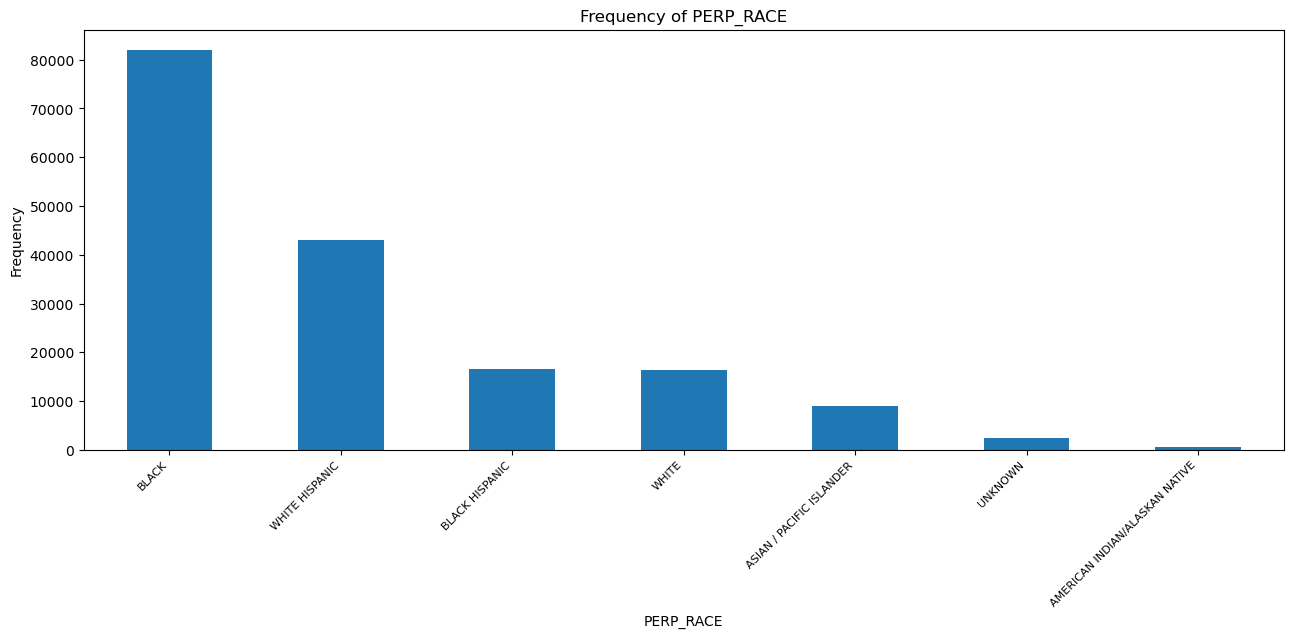

In [12]:
# We are gonna pick out some columns to graph since they are in categories as objects in the data

columns_graph = ['OFNS_DESC','LAW_CAT_CD','ARREST_BORO','AGE_GROUP','PERP_SEX','PERP_RACE']

# Create a separate plot for each object-type column
for column in columns_graph:
    
    plt.figure(figsize=(15, 6))  
    df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)
    plt.show()